# FastBCR Pipeline Analytics

FastBCR statistics stored in this directory:
`proevo-ab/lineages/fastbcr/output/run_stats`

In [1]:
# Concatenate all .csv files from run_stats

import pandas as pd
import gcsfs

def concatenate_csv_files_from_gcs(bucket_name: str, prefix: str, project: str = None) -> pd.DataFrame:
    """
    Concatenate all .csv files located in a given GCS directory into a single Pandas DataFrame.

    Parameters
    ----------
    bucket_name : str
        The name of the GCS bucket. For example, 'proevo-ab'.
    prefix : str
        The path within the bucket where the CSV files are stored.
        For example, 'lineages/fastbcr/output/run_stats'.
    project : str, optional
        The GCP project ID, if needed. Not always required if running with 
        appropriate credentials/environment.

    Returns
    -------
    pd.DataFrame
        A pandas DataFrame containing all the concatenated CSV data.
    """
    
    # Initialize the GCS filesystem interface
    fs = gcsfs.GCSFileSystem(project=project)
    
    # Construct the full path
    full_path = f"{bucket_name}/{prefix}".rstrip('/')
    
    # List all files under the specified prefix
    files = fs.ls(full_path)
    
    # Filter for .csv files
    csv_files = [f for f in files if f.endswith('.csv')]
    
    # Read each CSV into a DataFrame and accumulate in a list
    df_list = []
    for fpath in csv_files:
        with fs.open(fpath, 'rb') as f:
            df = pd.read_csv(f)
            df_list.append(df)
    
    # Concatenate all DataFrames into a single one
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)
    else:
        # If no CSV files are found, return an empty DataFrame or handle as needed
        combined_df = pd.DataFrame()
    
    return combined_df

In [2]:
# Example usage:

# df = concatenate_csv_files_from_gcs(
#     bucket_name='proevo-ab', 
#     prefix='lineages/fastbcr/output/run_stats', 
#     project='profluent-evo'
# )

df = pd.read_csv('fastBCR_stats.csv', index_col=0)

In [3]:
df.head()

,run,num_seqs,time,number_of_clusters,average_size_of_clusters,number_of_clustered_seqs,number_of_all_seqs,proportion_of_clustered_sequences
0,1279050,16429,-19.770368,8,22.00,176,14966,1.18%
1,1279051,12191,-18.575228,4,14.50,58,11376,0.51%
2,1279053,11289,-16.598670,2,14.50,29,10805,0.27%
3,1279055,5789,-11.525550,1,10.00,10,5571,0.18%
4,1279058,16162,-20.734078,11,19.18,211,14782,1.43%


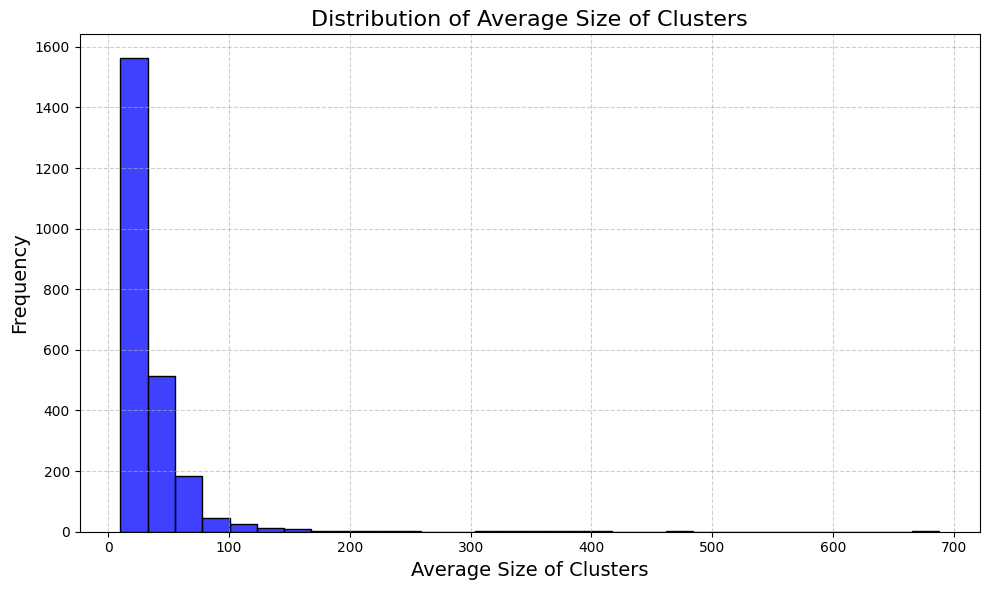

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is already loaded as `df`

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['average_size_of_clusters'], kde=False, bins=30, color='blue')

# Adding title and labels
plt.title('Distribution of Average Size of Clusters', fontsize=16)
plt.xlabel('Average Size of Clusters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
# Total number of sequences from OAS processed

df['num_seqs'].sum()
573_530_601

573530601

In [12]:
# Total number of clonal families
df['number_of_clusters'].sum()

np.int64(776226)

In [14]:
df['average_size_of_clusters'].median()

np.float64(24.485)

In [ ]:
df['proportion_of_clustered_sequences']

0        1.18%
1        0.51%
2        0.27%
3        0.18%
4        1.43%
         ...  
2371     5.71%
2372    29.27%
2373     6.22%
2374     5.63%
2375     6.29%
Name: proportion_of_clustered_sequences, Length: 2376, dtype: object

In [11]:
df.sort_values('num_seqs')

,run,num_seqs,time,number_of_clusters,average_size_of_clusters,number_of_clustered_seqs,number_of_all_seqs,proportion_of_clustered_sequences
67,ERR220427,44,-7.669243,1,10.00,10,17,58.82%
379,SRR11937625,54,-7.691386,1,20.00,20,25,80.00%
377,SRR11937623,57,-7.735123,1,15.00,15,18,83.33%
349,SRR11937586,82,-6.713915,1,11.00,11,15,73.33%
378,SRR11937624,86,-7.204748,1,24.00,24,31,77.42%
...,...,...,...,...,...,...,...,...
2104,SRR8283616,3735765,-2576.430368,308,39.63,12195,1064128,1.15%
2146,SRR8283873,3818225,-6433.511201,11199,34.17,382161,706549,54.09%
2102,SRR8283609,4148865,-2839.664702,419,40.37,16903,1082353,1.56%
2132,SRR8283668,4165599,-2843.474907,184,54.03,9937,2011599,0.49%
